In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator, ScalarFormatter
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
import joypy
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import joypy
import statsmodels.api as sm


In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [3]:
datajhsoa["SOA"]=0
datajh["SOA"]=0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("0.25um")):(datajhsoa.columns.get_loc("0.28um"))]:
    datajhsoa["SOA"]=datajhsoa["SOA"]+datajhsoa[i]
    datajh["SOA"]=datajh["SOA"]+datajh[i]
datajhsoa["CSOA"]=0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("C0.25um")):(datajhsoa.columns.get_loc("C0.28um"))]:
    datajhsoa["CSOA"]=datajhsoa["CSOA"]+datajhsoa[i]
datacmsoa["SOA"]=0
datacm["SOA"]=0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("0.25um")):(datacmsoa.columns.get_loc("0.28um"))]:
    datacmsoa["SOA"]=datacmsoa["SOA"]+datacmsoa[i]
    datacm["SOA"]=datacm["SOA"]+datacm[i]
datacmsoa["CSOA"]=0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("C0.25um")):(datacmsoa.columns.get_loc("C0.28um"))]:
    datacmsoa["CSOA"]=datacmsoa["CSOA"]+datacmsoa[i]

In [4]:

x=datajhsoa.groupby(["Hour_Min"]).mean().reset_index()["CSOA"].values.reshape(-1, 1)
y=datajhsoa.groupby(["Hour_Min"]).mean().reset_index()["SOA"].values
model=LinearRegression()
model.fit(x,y)


# 使用modely对测试数据进行预测
y_pred = model.predict(x)

# 计算MSE和R2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)

# 真实值 vs 预测值
axs[0].scatter(x, y, alpha=0.6, edgecolors='w', linewidth=0.5,color="#97A5C0")
axs[0].plot([min(x), max(x)], [min(y), max(y)], 'r--', lw=2)
axs[0].set_ylabel('SOA Concentration ($μg/m^3$)',fontsize=14)
axs[0].text(0.6, 0.4, f'MSE = {mse:.3f}\n$R^2$ = {r2:.3f}', transform=axs[0].transAxes, va='top',fontsize=15)

# 残差图
residuals = y - y_pred
axs[1].scatter(x, residuals, alpha=0.5, edgecolors='w', linewidth=0.5,color="#82ABA3",s=8)
axs[1].axhline(0, color='r', linestyle='--', lw=2)
axs[1].set_xlabel('$N_{SOA}$',fontsize=14)
axs[1].set_ylabel('Residuals',fontsize=14)

for ax in [axs[0],axs[1]]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
    ax.tick_params(axis='both', labelsize=13)

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改

    # 设置x轴刻度的格式为科学计数法
    formatter = ScalarFormatter(useOffset=True, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 4))  # 可以根据您的数据范围调整这里的参数
    ax.xaxis.set_major_formatter(formatter)

    # 设置x轴刻度的格式
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))


plt.subplots_adjust(hspace=0)  # 减少子图间距
plt.savefig("residual_SOAjh.svg", bbox_inches='tight')
plt.show()


KeyboardInterrupt



C:\Users\aa271\AppData\Local\Temp\ipykernel_30144\3691071703.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=datacmsoa.groupby(["Hour_Min"]).mean().reset_index()["CSOA"].values.reshape(-1, 1)
C:\Users\aa271\AppData\Local\Temp\ipykernel_30144\3691071703.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=datacmsoa.groupby(["Hour_Min"]).mean().reset_index()["SOA"].values


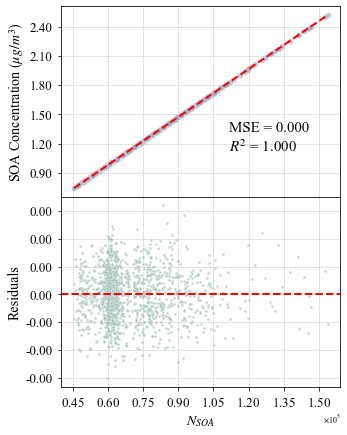

In [36]:
x=datacmsoa.groupby(["Hour_Min"]).mean().reset_index()["CSOA"].values.reshape(-1, 1)
y=datacmsoa.groupby(["Hour_Min"]).mean().reset_index()["SOA"].values
model=LinearRegression()
model.fit(x,y)


# 使用modely对测试数据进行预测
y_pred = model.predict(x)

# 计算MSE和R2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)

# 真实值 vs 预测值
axs[0].scatter(x, y, alpha=0.6, edgecolors='w', linewidth=0.5,color="#97A5C0")
axs[0].plot([min(x), max(x)], [min(y), max(y)], 'r--', lw=2)
axs[0].set_ylabel('SOA Concentration ($μg/m^3$)',fontsize=14)
axs[0].text(0.6, 0.4, f'MSE = {mse:.3f}\n$R^2$ = {r2:.3f}', transform=axs[0].transAxes, va='top',fontsize=15)

# 残差图
residuals = y - y_pred
axs[1].scatter(x, residuals, alpha=0.5, edgecolors='w', linewidth=0.5,color="#82ABA3",s=8)
axs[1].axhline(0, color='r', linestyle='--', lw=2)
axs[1].set_xlabel('$N_{SOA}$',fontsize=14)
axs[1].set_ylabel('Residuals',fontsize=14)

for ax in [axs[0],axs[1]]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
    ax.tick_params(axis='both', labelsize=13)

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改

    # 设置x轴刻度的格式为科学计数法
    formatter = ScalarFormatter(useOffset=True, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 4))  # 可以根据您的数据范围调整这里的参数
    ax.xaxis.set_major_formatter(formatter)

    # 设置x轴刻度的格式
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))


plt.subplots_adjust(hspace=0)  # 减少子图间距
plt.savefig("residual_SOAcm.svg", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_15928\826263452.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=datacm.groupby(["Hour_Min"]).mean().reset_index()["异戊二烯浓度"].values.reshape(-1, 1)
C:\Users\aa271\AppData\Local\Temp\ipykernel_15928\826263452.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=datacm.groupby(["Hour_Min"]).mean().reset_index()["SOA"].values


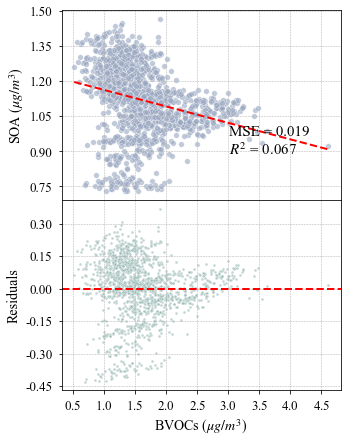

In [19]:

x=datacm.groupby(["Hour_Min"]).mean().reset_index()["异戊二烯浓度"].values.reshape(-1, 1)
y=datacm.groupby(["Hour_Min"]).mean().reset_index()["SOA"].values
xfit=sm.add_constant(x)
model=LinearRegression()
model.fit(xfit,y)


# 使用modely对测试数据进行预测
y_pred = model.predict(xfit)

# 计算MSE和R2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)

# 真实值 vs 预测值
axs[0].scatter(x, y, alpha=0.6, edgecolors='w', linewidth=0.5,color="#97A5C0")
# axs[0].plot([min(x), max(x)], [min(y), max(y)], 'r--', lw=2)
sns.regplot(x=x, y=y, scatter=False, line_kws={'linestyle': '--', 'linewidth': 2, 'color': 'r'},ax=axs[0],ci=None)
axs[0].set_ylabel('SOA ($μg/m^3$)',fontsize=14)
axs[0].text(0.6, 0.4, f'MSE = {mse:.3f}\n$R^2$ = {r2:.3f}', transform=axs[0].transAxes, va='top',fontsize=15)

# 残差图
residuals = y - y_pred
axs[1].scatter(x, residuals, alpha=0.5, edgecolors='w', linewidth=0.5,color="#82ABA3",s=8)
axs[1].axhline(0, color='r', linestyle='--', lw=2)
axs[1].set_xlabel('BVOCs ($μg/m^3$)',fontsize=14)
axs[1].set_ylabel('Residuals',fontsize=14)

for ax in [axs[0],axs[1]]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
    ax.tick_params(axis='both', labelsize=13)

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改

    # 设置x轴刻度的格式为科学计数法
    formatter = ScalarFormatter(useOffset=True, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 4))  # 可以根据您的数据范围调整这里的参数
    ax.xaxis.set_major_formatter(formatter)

    # 设置x轴刻度的格式
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))


plt.subplots_adjust(hspace=0)  # 减少子图间距
plt.savefig("直接拟合.svg", bbox_inches='tight')
plt.show()

In [4]:
dataj=pd.DataFrame()
datare=datajh.groupby(["Hour_Min"]).mean().reset_index()

dataj["Time"]=datare["Hour_Min"]
# 转换时间数据
dataj['Time'] = pd.to_datetime(dataj['Time'])


dataj["BVOC"]=datare.异戊二烯浓度
# dataj["BVOC"]=datare['异戊二烯浓度']+datare["1,3-丁二烯浓度"]+datare["戊烯浓度"]+datare["丁烯浓度"]
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
dataj["SOA"]=0
for i in datare.columns[(datare.columns.get_loc("0.25um")):(datare.columns.get_loc("0.28um"))]:
    dataj["SOA"]=dataj["SOA"]+datare[i]
dataj["K"]=1

dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]
# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","K","hv"]
for var in variables_to_regress:
    dataj[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

# 选择变量进行线性回归
X = dataj[[var + "_BVOC" for var in variables_to_regress]] # 自变量
Y = dataj["SOA"] # 因变量

# 进行线性回归
model = sm.OLS(Y, X).fit(cov_type='HC3')

# 输出结果
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    SOA   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              2244.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        00:43:22   Log-Likelihood:                         -267.62
No. Observations:                1440   AIC:                                      549.2
Df Residuals:                    1433   BIC:                                      586.1
Df Model:                           7                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

C:\Users\aa271\AppData\Local\Temp\ipykernel_34912\4401576.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datare=datajh.groupby(["Hour_Min"]).mean().reset_index()


In [169]:
variablename=['[HNO$_3$][BVOCs]',
 '[H$_2$SO$_4$][BVOCs]',
 '[H$_2$SO$_4$][O$_3$][BVOCs]',
 '[HNO$_3$][O$_3$][BVOCs]',
 '[O$_3$][BVOCs]',
 '[BVOCs]',
 '[BVOCs][$hv$]']

# 进行线性回归
model = sm.OLS(Y, X).fit(cov_type='HC3')

# 从模型对象中提取信息
params = model.params
std_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues

# 构建DataFrame
result_df = pd.DataFrame({
    'Coefficient': params,
    'Std. Error': std_errors,
    't': t_values,
    'P>|t|': p_values
})
result_df.index=variablename
result_df.to_excel("金海分钟回归SOA.xlsx")
# 打印结果
result_df

,Coefficient,Std. Error,t,P>|t|
[HNO$_3$][BVOCs],-0.000030,0.000020,-1.485108,1.375152e-01
[H$_2$SO$_4$][BVOCs],0.002795,0.000357,7.832106,4.797657e-15
[H$_2$SO$_4$][O$_3$][BVOCs],-0.000058,0.000008,-7.649182,2.022620e-14
[HNO$_3$][O$_3$][BVOCs],0.000051,0.000004,13.483902,1.945401e-41
[O$_3$][BVOCs],-0.000103,0.000030,-3.415685,6.362189e-04
[BVOCs],-0.290011,0.140078,-2.070355,3.841912e-02
[BVOCs][$hv$],0.002815,0.000778,3.617412,2.975637e-04


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 创建一个DataFrame来存储VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# 计算VIF值
vif_data["VIF jh"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF jh
0,HNO3_BVOC,11.646112
1,H2SO4_BVOC,379.823191
2,H2SO403_BVOC,47.346174
3,HNO3O3_BVOC,29.253604
4,O3_BVOC,64.066738
5,K_BVOC,521.046193
6,hv_BVOC,57.061079


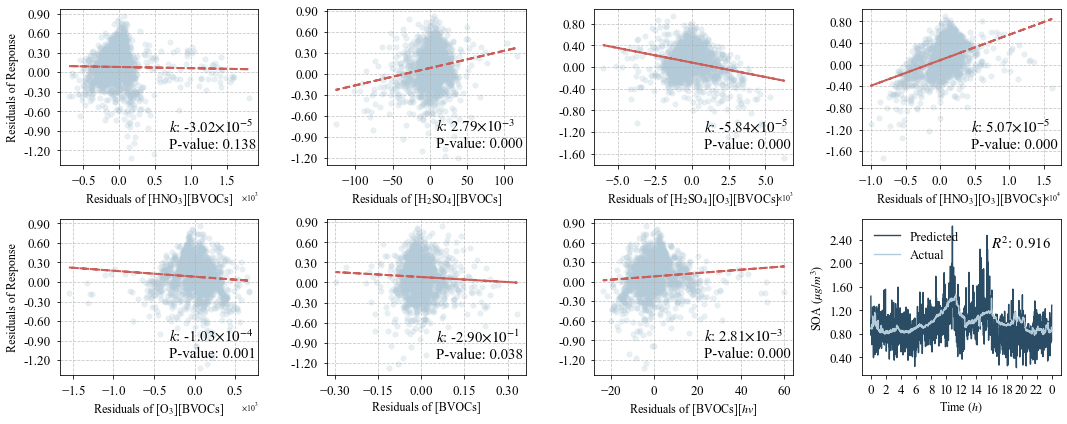

In [181]:


# 创建一个2行4列的图形
fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# 获取模型的系数和p值
coefficients = model.params
p_values = model.pvalues

# 函数将数字转换为乘方形式
def sci_notation(num, decimal_digits=2):
    if num != 0:
        exponent = np.floor(np.log10(np.abs(num)))
        mantissa = num / 10**exponent

        return f"{mantissa:.{decimal_digits}f}"+"$×10^"+"{"+str(int(exponent))+"}$"
    else:
        return "0"


# 遍历所有变量，绘制部分回归图
for i, variable in enumerate(model.model.exog_names):
    ax = axs[i // 4, i % 4] # 确定子图的位置
    variable_idx = model.model.exog_names.index(variable)

    # 创建局部变量用于部分回归图的绘制
    X_local = np.delete(model.model.exog, variable_idx, axis=1)
    Y_local = model.model.endog

    # 拟合没有选择变量的模型
    model_without_variable = sm.OLS(Y_local, X_local).fit(cov_type='HC3')
    residuals_Y = Y_local - model_without_variable.predict(X_local)

    # 计算选择变量的残差
    model_for_variable = sm.OLS(model.model.exog[:, variable_idx], X_local).fit()
    residuals_X = model.model.exog[:, variable_idx] - model_for_variable.predict(X_local)

    # 绘制部分回归图
    ax.scatter(residuals_X, residuals_Y,color="#B3CAD8", alpha=0.3,marker='o')
    ax.set_xlabel(f'Residuals of {variablename[i]}', fontsize=12)
    if i==0 or i==4:
        ax.set_ylabel('Residuals of Response', fontsize=12)
    # ax.set_title(f'Partial Regression Plot for {variable}', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

    # 标注系数和显著性
    coef = coefficients[variable_idx]
    p_value = p_values[variable_idx]

    coef = sci_notation(coefficients[variable_idx])
    ax.text(0.55, 0.3, f'$k$: {coef}\nP-value: {p_value:.3f}', transform=ax.transAxes, verticalalignment='top', fontsize=15)

    # 添加拟合线
    reg_line = sm.OLS(residuals_Y, sm.add_constant(residuals_X)).fit().fittedvalues
    ax.plot(residuals_X, reg_line, color='#CC5F5A', linestyle='--',linewidth=2)
    
    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改

    # 设置x轴刻度的格式为科学计数法
    formatter = ScalarFormatter(useOffset=True, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 3))  # 可以根据您的数据范围调整这里的参数


    # 设置x轴刻度的格式
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.xaxis.set_major_formatter(formatter)

    ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(axis='both', labelsize=13)


predictions=model.predict(X)
dataj["predict"]=predictions
ax=  axs[1][3]
sns.lineplot(x=dataj.Time,y=dataj.predict, label='Predicted',ax=ax,color="#2A4C65")
sns.lineplot(x=dataj.Time,y=dataj.SOA, label='Actual',ax=ax,color="#B3CAD8")
ax.set_xlabel('Time $(h)$', fontsize=12)
ax.set_ylabel('SOA ($μg/m^3$)', fontsize=12)

import matplotlib.dates as mdates
ax.tick_params(axis='both', labelsize=13)

# 自定义格式化函数
def custom_hour_formatter(x, pos):
    dt = mdates.num2date(x)
    hour = dt.strftime('%H')
    # 如果小时小于10，则去除前导零
    if hour.startswith('0'):
        hour = hour[1:]
    return hour if dt.minute == 0 else ''

ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.legend(title='', frameon=False, loc="upper left", fontsize=13)
r2 = model.rsquared
ax.text(0.65, 0.9, f'$R^2$: {r2:.3f}', transform=ax.transAxes, verticalalignment='top', fontsize=15)


# # 移除最后一个空白的子图
# fig.delaxes(axs[1][3])

# 调整子图布局
plt.tight_layout()

plt.savefig("SOA FIT residual JH.svg", bbox_inches='tight')
plt.savefig("SOA FIT residual JH.jpg", bbox_inches='tight',dpi=1000)
# 显示图形
plt.show()

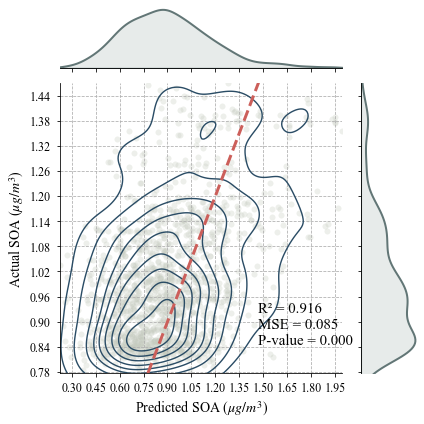

In [190]:
predictions=model.predict(X)
# 计算残差
residuals = Y - predictions

# 计算残差的标准差
std_dev = np.std(residuals)

# 定义离群值的阈值，例如，超过2个标准差
threshold = 3 * std_dev

# 过滤掉离群值
filtered_indices = np.abs(residuals) < threshold
filtered_predictions = predictions[filtered_indices]
filtered_actuals = Y[filtered_indices]


# 计算R²和MSE
r2 = model.rsquared
pvalue=model.f_pvalue
mse = mean_squared_error(Y, predictions)


# 创建JointGrid对象
g = sns.JointGrid(x=filtered_predictions, y=filtered_actuals, space=0, ratio=4, height=6)


# 在边缘绘制KDE
g = g.plot_marginals(sns.kdeplot, color="#A1B0AD", fill=True, edgecolor="#627676",linewidth=2)

# 在中心绘制散点图
g = g.plot_joint(plt.scatter, color="#C6CCC0", alpha=0.3,marker='o')

# 密度图
g = g.plot_joint(sns.kdeplot, color="#2A4C65",fill=False)

# 绘制 y = x 线表示理想情况
g.ax_joint.plot([min(filtered_actuals), max(filtered_actuals)], [min(filtered_actuals), max(filtered_actuals)], color='#CC5F5A', linestyle='--',linewidth=3)

# 添加标题、轴标签和文本
plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Predicted vs Actual Values', fontsize=14)
g.ax_joint.set_xlabel('Predicted SOA ($μg/m^3$)', fontsize=14)
g.ax_joint.set_ylabel('Actual SOA ($μg/m^3$)', fontsize=14)
g.ax_joint.text(0.7,0.1, f'R² = {r2:.3f}\nMSE = {mse:.3f}\nP-value = {pvalue:.3f}', fontsize=15, color='black', transform=g.ax_joint.transAxes)

# 设置坐标轴范围
g.ax_joint.set_xlim(filtered_predictions.min(), filtered_predictions.max())
g.ax_joint.set_ylim(filtered_actuals.min(), filtered_actuals.max())



def format_ticks(x, pos):
    return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
# 设置x轴刻度的格式
g.ax_joint.yaxis.set_major_formatter(FuncFormatter(format_ticks))
g.ax_joint.xaxis.set_major_formatter(FuncFormatter(format_ticks))
g.ax_joint.yaxis.set_major_locator(MaxNLocator(nbins=12))
g.ax_joint.xaxis.set_major_locator(MaxNLocator(nbins=12))
g.ax_joint.tick_params(axis='both', labelsize=12)

g.ax_joint.grid(linestyle='--')

# 显示图形
plt.tight_layout()
plt.savefig("SOA FIT JINHAI.svg", bbox_inches='tight')
plt.show()

In [6]:
dataj=pd.DataFrame()
datare=datacm.groupby(["Hour_Min"]).mean().reset_index()

dataj["Time"]=datare["Hour_Min"]
# 转换时间数据
dataj['Time'] = pd.to_datetime(dataj['Time'])


dataj["BVOC"]=datare.异戊二烯浓度
# dataj["BVOC"]=datare['异戊二烯浓度']+datare["1,3-丁二烯浓度"]+datare["戊烯浓度"]+datare["丁烯浓度"]
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
dataj["SOA"]=0
for i in datare.columns[(datare.columns.get_loc("0.25um")):(datare.columns.get_loc("0.28um"))]:
    dataj["SOA"]=dataj["SOA"]+datare[i]
dataj["K"]=1

dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]
# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","K","hv"]
for var in variables_to_regress:
    dataj[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

# 选择变量进行线性回归
X = dataj[[var + "_BVOC" for var in variables_to_regress]] # 自变量
Y = dataj["SOA"] # 因变量

# 进行线性回归
model = sm.OLS(Y, X).fit(cov_type='HC3')

# 输出结果
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    SOA   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              4028.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        00:43:50   Log-Likelihood:                         -132.49
No. Observations:                1440   AIC:                                      279.0
Df Residuals:                    1433   BIC:                                      315.9
Df Model:                           7                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

C:\Users\aa271\AppData\Local\Temp\ipykernel_34912\1704171136.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datare=datacm.groupby(["Hour_Min"]).mean().reset_index()


In [171]:
variablename=['[HNO$_3$][BVOCs]',
 '[H$_2$SO$_4$][BVOCs]',
 '[H$_2$SO$_4$][O$_3$][BVOCs]',
 '[HNO$_3$][O$_3$][BVOCs]',
 '[O$_3$][BVOCs]',
 '[BVOCs]',
 '[BVOCs][$hv$]']

# 进行线性回归
model = sm.OLS(Y, X).fit(cov_type='HC3')

# 从模型对象中提取信息
params = model.params
std_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues

# 构建DataFrame
result_df = pd.DataFrame({
    'Coefficient': params,
    'Std. Error': std_errors,
    't': t_values,
    'P>|t|': p_values
})
result_df.index=variablename
result_df.to_excel("崇明分钟回归SOA.xlsx")
# 打印结果
result_df

,Coefficient,Std. Error,t,P>|t|
[HNO$_3$][BVOCs],0.000018,0.000107,0.171879,8.635328e-01
[H$_2$SO$_4$][BVOCs],0.001221,0.000233,5.236411,1.637289e-07
[H$_2$SO$_4$][O$_3$][BVOCs],-0.000055,0.000007,-8.175686,2.941868e-16
[HNO$_3$][O$_3$][BVOCs],0.000003,0.000004,0.863927,3.876280e-01
[O$_3$][BVOCs],0.001512,0.000233,6.501755,7.938851e-11
[BVOCs],0.592972,0.037909,15.642071,3.762880e-55
[BVOCs][$hv$],-0.037520,0.007255,-5.171335,2.324277e-07


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["feature"] = X.columns
# 计算VIF值
vif_data["VIF cm"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [8]:
vif_data=vif_data.sort_values(by="VIF jh")
vif_data.to_excel("vif high.xlsx")
vif_data

,feature,VIF jh,VIF cm
0,HNO3_BVOC,11.646112,145.093835
3,HNO3O3_BVOC,29.253604,137.426603
2,H2SO403_BVOC,47.346174,199.016735
6,hv_BVOC,57.061079,20.606271
4,O3_BVOC,64.066738,28.411544
1,H2SO4_BVOC,379.823191,296.751335
5,K_BVOC,521.046193,146.347848


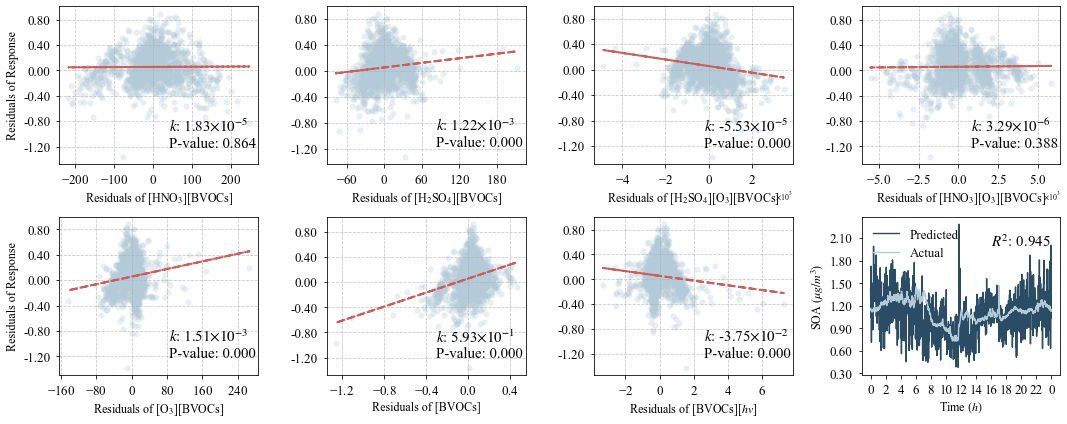

In [183]:
# 创建一个2行4列的图形
fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# 获取模型的系数和p值
coefficients = model.params
p_values = model.pvalues

# 函数将数字转换为乘方形式
def sci_notation(num, decimal_digits=2):
    if num != 0:
        exponent = np.floor(np.log10(np.abs(num)))
        mantissa = num / 10**exponent

        return f"{mantissa:.{decimal_digits}f}"+"$×10^"+"{"+str(int(exponent))+"}$"
    else:
        return "0"


# 遍历所有变量，绘制部分回归图
for i, variable in enumerate(model.model.exog_names):
    ax = axs[i // 4, i % 4] # 确定子图的位置
    variable_idx = model.model.exog_names.index(variable)

    # 创建局部变量用于部分回归图的绘制
    X_local = np.delete(model.model.exog, variable_idx, axis=1)
    Y_local = model.model.endog

    # 拟合没有选择变量的模型
    model_without_variable = sm.OLS(Y_local, X_local).fit(cov_type='HC3')
    residuals_Y = Y_local - model_without_variable.predict(X_local)

    # 计算选择变量的残差
    model_for_variable = sm.OLS(model.model.exog[:, variable_idx], X_local).fit()
    residuals_X = model.model.exog[:, variable_idx] - model_for_variable.predict(X_local)

    # 绘制部分回归图
    ax.scatter(residuals_X, residuals_Y,color="#B3CAD8", alpha=0.3,marker='o')
    ax.set_xlabel(f'Residuals of {variablename[i]}', fontsize=12)
    if i==0 or i==4:
        ax.set_ylabel('Residuals of Response', fontsize=12)
    # ax.set_title(f'Partial Regression Plot for {variable}', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

    # 标注系数和显著性
    coef = coefficients[variable_idx]
    p_value = p_values[variable_idx]

    coef = sci_notation(coefficients[variable_idx])
    ax.text(0.55, 0.3, f'$k$: {coef}\nP-value: {p_value:.3f}', transform=ax.transAxes, verticalalignment='top', fontsize=15)

    # 添加拟合线
    reg_line = sm.OLS(residuals_Y, sm.add_constant(residuals_X)).fit().fittedvalues
    ax.plot(residuals_X, reg_line, color='#CC5F5A', linestyle='--',linewidth=2)

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改

    # 设置x轴刻度的格式为科学计数法
    formatter = ScalarFormatter(useOffset=True, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 3))  # 可以根据您的数据范围调整这里的参数


    # 设置x轴刻度的格式
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.xaxis.set_major_formatter(formatter)

    ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(axis='both', labelsize=13)


predictions=model.predict(X)
dataj["predict"]=predictions
ax=  axs[1][3]
sns.lineplot(x=dataj.Time,y=dataj.predict, label='Predicted',ax=ax,color="#2A4C65")
sns.lineplot(x=dataj.Time,y=dataj.SOA, label='Actual',ax=ax,color="#B3CAD8")
ax.set_xlabel('Time $(h)$', fontsize=12)
ax.set_ylabel('SOA ($μg/m^3$)', fontsize=12)

import matplotlib.dates as mdates
ax.tick_params(axis='both', labelsize=13)

# 自定义格式化函数
def custom_hour_formatter(x, pos):
    dt = mdates.num2date(x)
    hour = dt.strftime('%H')
    # 如果小时小于10，则去除前导零
    if hour.startswith('0'):
        hour = hour[1:]
    return hour if dt.minute == 0 else ''

ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
ax.legend(title='', frameon=False, loc="upper left", fontsize=13)
r2 = model.rsquared
ax.text(0.65, 0.9, f'$R^2$: {r2:.3f}', transform=ax.transAxes, verticalalignment='top', fontsize=15)


# # 移除最后一个空白的子图
# fig.delaxes(axs[1][3])

# 调整子图布局
plt.tight_layout()

plt.savefig("SOA FIT residual CM.svg", bbox_inches='tight')
plt.savefig("SOA FIT residual CM.jpg", bbox_inches='tight',dpi=1000)
# 显示图形
plt.show()

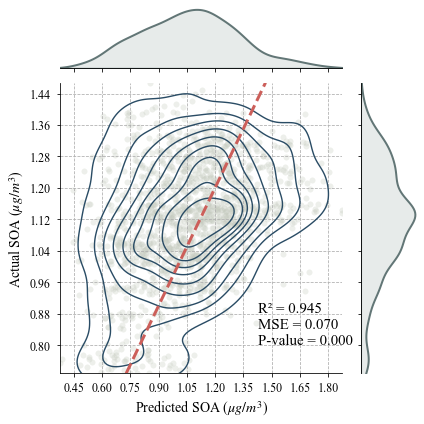

In [188]:
predictions=model.predict(X)
# 计算残差
residuals = Y - predictions

# 计算残差的标准差
std_dev = np.std(residuals)

# 定义离群值的阈值，例如，超过2个标准差
threshold = 3 * std_dev

# 过滤掉离群值
filtered_indices = np.abs(residuals) < threshold
filtered_predictions = predictions[filtered_indices]
filtered_actuals = Y[filtered_indices]


# 计算R²和MSE
r2 = model.rsquared
pvalue=model.f_pvalue
mse = mean_squared_error(Y, predictions)


# 创建JointGrid对象
g = sns.JointGrid(x=filtered_predictions, y=filtered_actuals, space=0, ratio=4, height=6)


# 在边缘绘制KDE
g = g.plot_marginals(sns.kdeplot, color="#A1B0AD", fill=True, edgecolor="#627676",linewidth=2)

# 在中心绘制散点图
g = g.plot_joint(plt.scatter, color="#C6CCC0", alpha=0.3,marker='o')

# 密度图
g = g.plot_joint(sns.kdeplot, color="#2A4C65",fill=False)

# 绘制 y = x 线表示理想情况
g.ax_joint.plot([min(filtered_actuals), max(filtered_actuals)], [min(filtered_actuals), max(filtered_actuals)], color='#CC5F5A', linestyle='--',linewidth=3)

# 添加标题、轴标签和文本
plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Predicted vs Actual Values', fontsize=14)
g.ax_joint.set_xlabel('Predicted SOA ($μg/m^3$)', fontsize=14)
g.ax_joint.set_ylabel('Actual SOA ($μg/m^3$)', fontsize=14)
g.ax_joint.text(0.7,0.1, f'R² = {r2:.3f}\nMSE = {mse:.3f}\nP-value = {pvalue:.3f}', fontsize=15, color='black', transform=g.ax_joint.transAxes)

# 设置坐标轴范围
g.ax_joint.set_xlim(filtered_predictions.min(), filtered_predictions.max())
g.ax_joint.set_ylim(filtered_actuals.min(), filtered_actuals.max())



def format_ticks(x, pos):
    return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
# 设置x轴刻度的格式
g.ax_joint.yaxis.set_major_formatter(FuncFormatter(format_ticks))
g.ax_joint.xaxis.set_major_formatter(FuncFormatter(format_ticks))
g.ax_joint.yaxis.set_major_locator(MaxNLocator(nbins=12))
g.ax_joint.xaxis.set_major_locator(MaxNLocator(nbins=12))
g.ax_joint.tick_params(axis='both', labelsize=12)

g.ax_joint.grid(linestyle='--')

# 显示图形
plt.tight_layout()
plt.savefig("SOA FIT CM.svg", bbox_inches='tight')
plt.show()